<a href="https://colab.research.google.com/github/sezaionurlu/House-Price-Prediction-Model/blob/main/proje_6_Makine_%C3%96%C4%9Frenmesi_adl%C4%B1_dosyan%C4%B1n_kopyas%C4%B1_adl%C4%B1_dosyan%C4%B1n_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

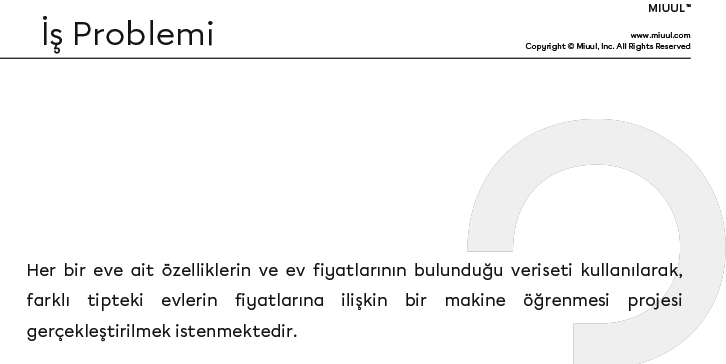

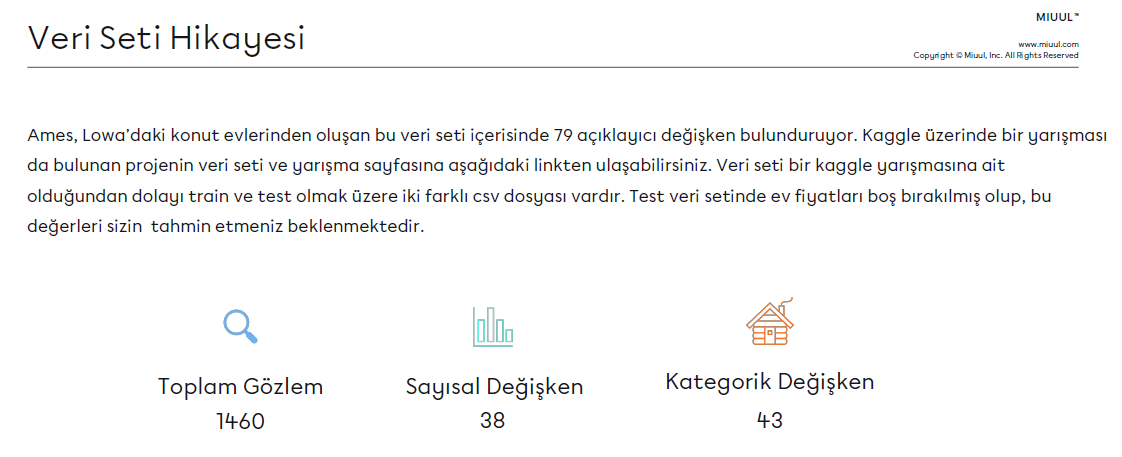

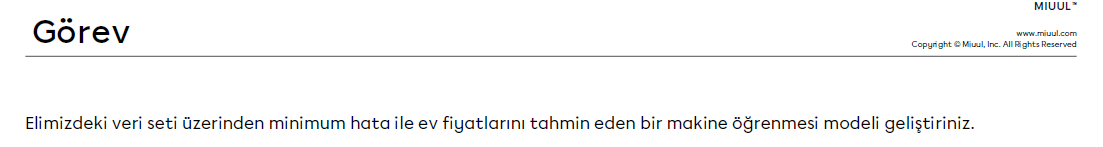

* SalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalışılan hedef değişkendir.
* MSSubClass: İnşaat sınıfı
* MSZoning: Genel imar sınıflandırması
* LotFrontage: Mülkiyetin cadde ile doğrudan bağlantısının olup olmaması
* LotArea: Parsel büyüklüğü
* Street: Yol erişiminin tipi
* Alley: Sokak girişi tipi
* LotShape: Mülkün genel şekli
* LandContour: Mülkün düzlüğü
* Utulities: Mevcut hizmetlerin türü
* LotConfig: Parsel yapılandırması
* LandSlope: Mülkün eğimi
* Neighborhood: Ames şehir sınırları içindeki fiziksel konumu
* Condition1: Ana yol veya tren yoluna yakınlık
* Condition2: Ana yola veya demiryoluna yakınlık (eğer ikinci bir yer varsa)
* BldgType: Konut tipi
* HouseStyle: Konut sitili
* OverallQual: Genel malzeme ve bitiş kalitesi
* OverallCond: Genel durum değerlendirmesi
* YearBuilt: Orijinal yapım tarihi
* YearRemodAdd: Yeniden düzenleme tarihi
* RoofStyle: Çatı tipi
* RoofMatl: Çatı malzemesi
* Exterior1st: Evdeki dış kaplama
* Exterior2nd: Evdeki dış kaplama (birden fazla malzeme varsa)
* MasVnrType: Duvar kaplama türü
* MasVnrArea: Kare ayaklı duvar kaplama alanı
* ExterQual: Dış malzeme kalitesi
* ExterCond: Malzemenin dışta mevcut durumu
* Foundation: Vakıf tipi
* BsmtQual: Bodrumun yüksekliği
* BsmtCond: Bodrum katının genel durumu
* BsmtExposure: Yürüyüş veya bahçe katı bodrum duvarları
* BsmtFinType1: Bodrum bitmiş alanının kalitesi
* BsmtFinSF1: Tip 1 bitmiş alanın metre karesi
* BsmtFinType2: İkinci bitmiş alanın kalitesi (varsa)
* BsmtFinSF2: Tip 2 bitmiş alanın metre karesi
* BsmtUnfSF: Bodrumun bitmemiş alanın metre karesi
* TotalBsmtSF: Bodrum alanının toplam metre karesi
* Heating: Isıtma tipi
* HeatingQC: Isıtma kalitesi ve durumu
* CentralAir: Merkezi klima
* Electrical: elektrik sistemi
* 1stFlrSF: Birinci Kat metre kare alanı
* 2ndFlrSF: İkinci kat metre kare alanı
* LowQualFinSF: Düşük kaliteli bitmiş alanlar (tüm katlar)
* GrLivArea: Üstü (zemin) oturma alanı metre karesi
* BsmtFullBath: Bodrum katındaki tam banyolar
* BsmtHalfBath: Bodrum katındaki yarım banyolar
* FullBath: Üst katlardaki tam banyolar
* HalfBath: Üst katlardaki yarım banyolar
* BedroomAbvGr: Bodrum seviyesinin üstünde yatak odası sayısı
* KitchenAbvGr: Bodrum seviyesinin üstünde mutfak Sayısı
* KitchenQual: Mutfak kalitesi
* TotRmsAbvGrd: Üst katlardaki toplam oda (banyo içermez)
* Functional: Ev işlevselliği değerlendirmesi
* Fireplaces: Şömineler
* FireplaceQu: Şömine kalitesi
* Garage Türü: Garaj yeri
* GarageYrBlt: Garajın yapım yılı
* GarageFinish: Garajın iç yüzeyi
* GarageCars: Araç kapasitesi
* GarageArea: Garajın alanı
* GarageQual: Garaj kalitesi
* GarageCond: Garaj durumu
* PavedDrive: Garajla yol arasındaki yol
* WoodDeckSF: Ayaklı ahşap güverte alanı
* OpenPorchSF: Kapı önündeki açık veranda alanı
* EnclosedPorch: Kapı önündeki kapalı veranda alan
* 3SsPorch: Üç mevsim veranda alanı
* ScreenPorch: Veranda örtü alanı
* PoolArea: Havuzun metre kare alanı
* PoolQC: Havuz kalitesi
* Fence: Çit kalitesi
* MiscFeature: Diğer kategorilerde bulunmayan özellikler
* MiscVal: Çeşitli özelliklerin değeri
* MoSold: Satıldığı ay
* YrSold: Satıldığı yıl
* SaleType: Satış Türü
* SaleCondition: Satış Durumu

In [ ]:
# Keşifçi Veri Analizi (Exploratory Data Analysis-EDA)

In [ ]:
# Gerekli kütüphaneler geliştirme ortamına dahil ediliyor

#Veri işleme kütüphanleri
import numpy as np 
import pandas as pd 

#Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

#istatistik kütüphaneleri
from scipy import stats
from scipy.stats import norm, skew 

#Makine öğrenmesi kütüphaneleri
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/8/train.csv')
test =  pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/8/test.csv')

In [ ]:
#Gönderi hazırlanırken lazım olacağı için veri setlerindeki örneklerin
# id numaralarını tutuyoruz
train_ids=train['Id']
test_ids=test['Id']

# Makine öğrenemsi modelleri için id numarasının anlamı olmadığı için
# veri setinden çıkartıyoruz
train.drop('Id',axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)

In [ ]:
train.shape

(1460, 80)

In [ ]:
test.shape

(1459, 79)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Veri setide 80 özellik yer almaktadır. SalePrice özelliği hedef özelliktir ve regresyonla sonucu tahmin edilecek değerleri tutmaktadır.
# Veri setinde eksik bilgiler vardır. Eksik bilgilerin doldurulması gerekmektedir.
# Veri setinde metin değerler vardır. Metin değerlerin sayısala dönüştülmesi gerekmektedir.
# train veri seti, test veri setinden bir fazla sütün içermektedir. Bu sütün veri setindeki evlerin fiyatlarını içermektedir.
# Modelimizi, train verisetine göre eğittikten sonra test veri setine uygulayacağız.

In [ ]:
# Veri setindeki özelliklerin eksik değerlerini sayısal ve
# görsel olarak verir.
def show_missing_values(function_data):
#Veri setindeki eksik değerleri bulalım
    number_of_sample=function_data.shape[0]
    check_isnull=function_data.isnull().sum()
    
    check_isnull=check_isnull[check_isnull!=0].sort_values(ascending=False)

    if check_isnull.shape[0]==0:
        print("Veri setinde eksik bilgi yoktur")
        print(check_isnull)
    else:
        print(check_isnull)
        f, ax = plt.subplots(figsize=(15, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=check_isnull.index, y=check_isnull)
        plt.title("Eksik veri içeren özellilere ait eksik veri sayısı")

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


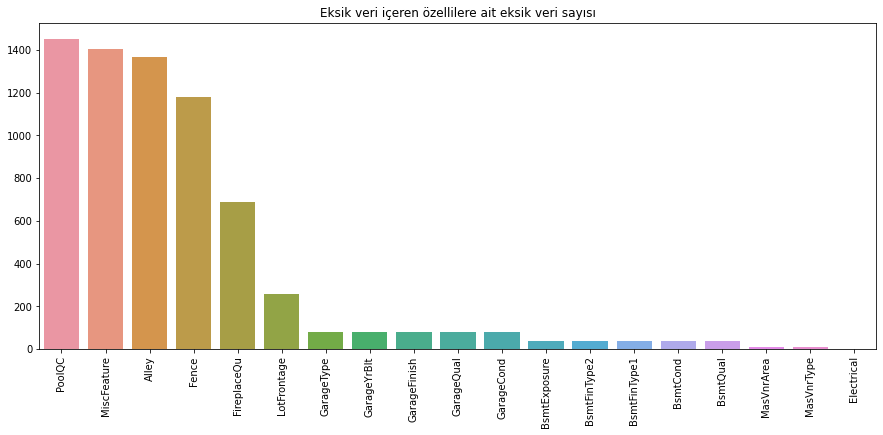

In [ ]:
#train veri seti için eksik bilgiler gösterilsin
show_missing_values(train)

In [ ]:
#veri setindeki özelliklerin birbirleriyle olan korelasyonunu elde edilir.
corr=train.corr().abs()
n_most_correlated=12
#'SalePrice' ile en yüksek korelasyona sahip özellikler elde edilir.
most_correlated_feature=corr['SalePrice'].sort_values(ascending=False)[:n_most_correlated].drop('SalePrice')
#En yüksek korelasyona sahip özelliklerin adları elde edilr. 
most_correlated_feature_name=most_correlated_feature.index.values

Text(0.5, 1.0, 'SalePrice ile en fazla korelasyona sahip özellikler')

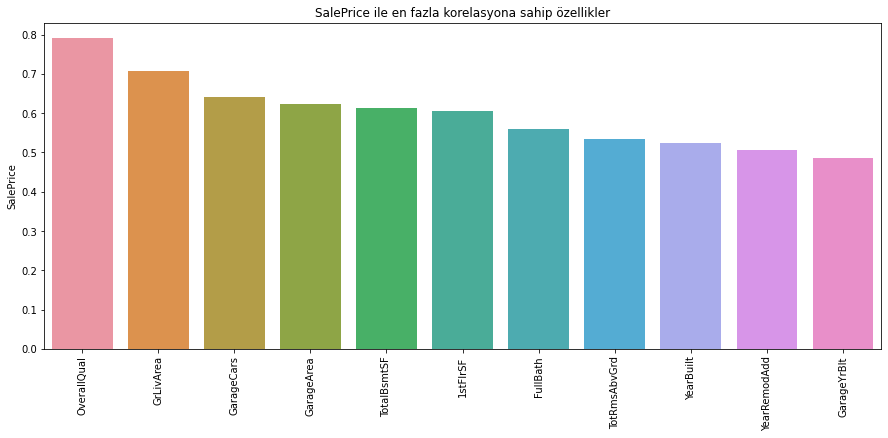

In [ ]:
#En yüksek korelasyona sahip özellikler barplot ile gösteririlir
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=most_correlated_feature_name, y=most_correlated_feature)
plt.title("SalePrice ile en fazla korelasyona sahip özellikler")

In [ ]:
def draw_scatter_pairs(data,cols=4, rows=3):
    feature_names=data.columns.values

    counter=0
    fig, axarr = plt.subplots(rows,cols,figsize=(22,16))
    for i in range(rows):
        for j in range(cols):
            if counter>=len(feature_names):
                break

            name=feature_names[counter]
            axarr[i][j].scatter(x = data[name], y = data['SalePrice'])
            axarr[i][j].set(xlabel=name, ylabel='SalePrice')

            counter+=1


    plt.show()

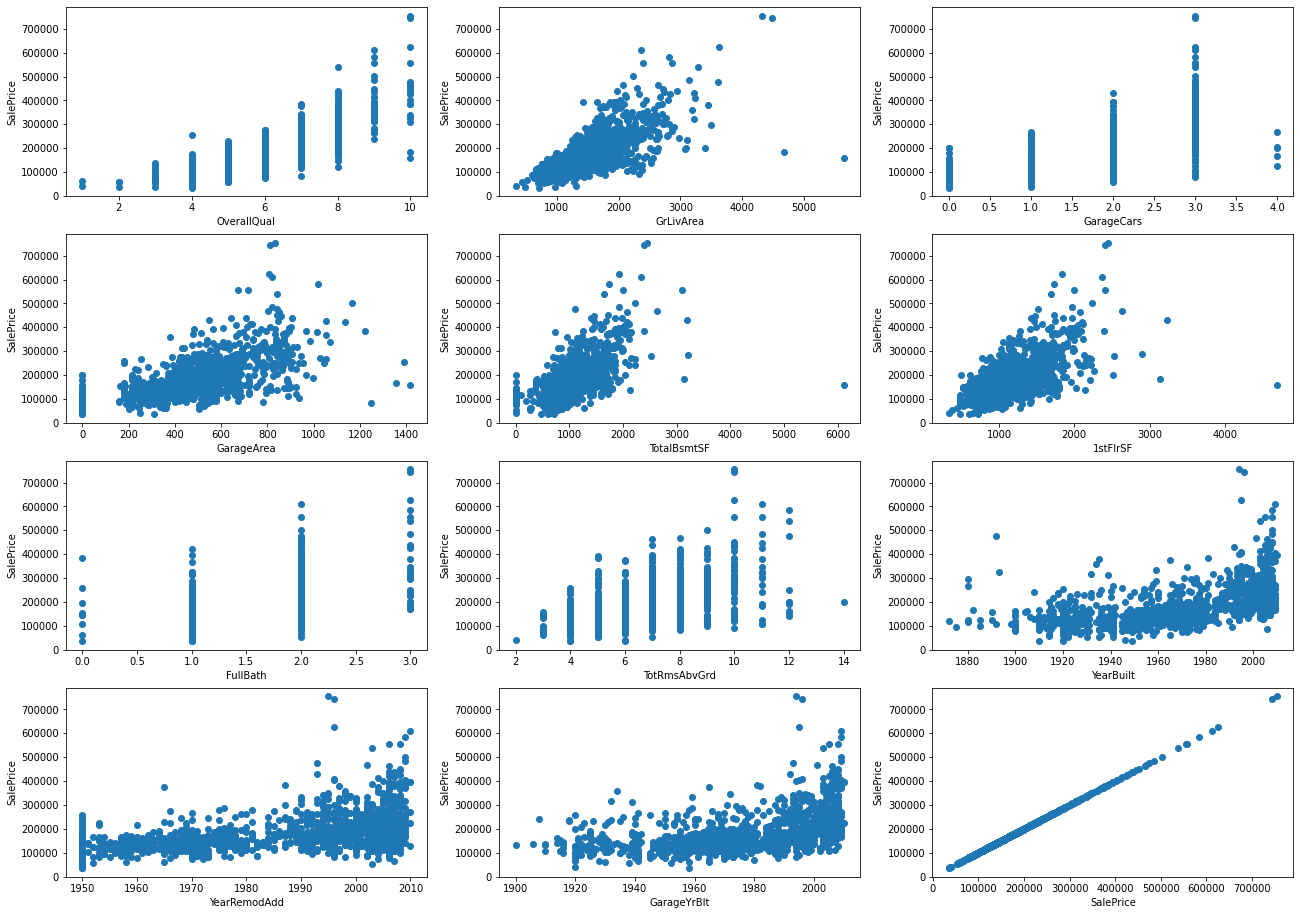

In [ ]:
#'SalePrice' ile en yüksek korelasyona sahip özelliklerin 
#grafikle gösterimi
feature_names =list(most_correlated_feature_name) + ['SalePrice']
draw_scatter_pairs(train[feature_names], rows=4, cols=3)

In [ ]:
print("Aykırı değerler çıkarılmadan önce train.shape:",train.shape)

Aykırı değerler çıkarılmadan önce train.shape: (1460, 80)


In [ ]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [ ]:
print("Aykırı değerler çıkarıldıktan sonra train.shape:",train.shape)

Aykırı değerler çıkarıldıktan sonra train.shape: (1458, 80)


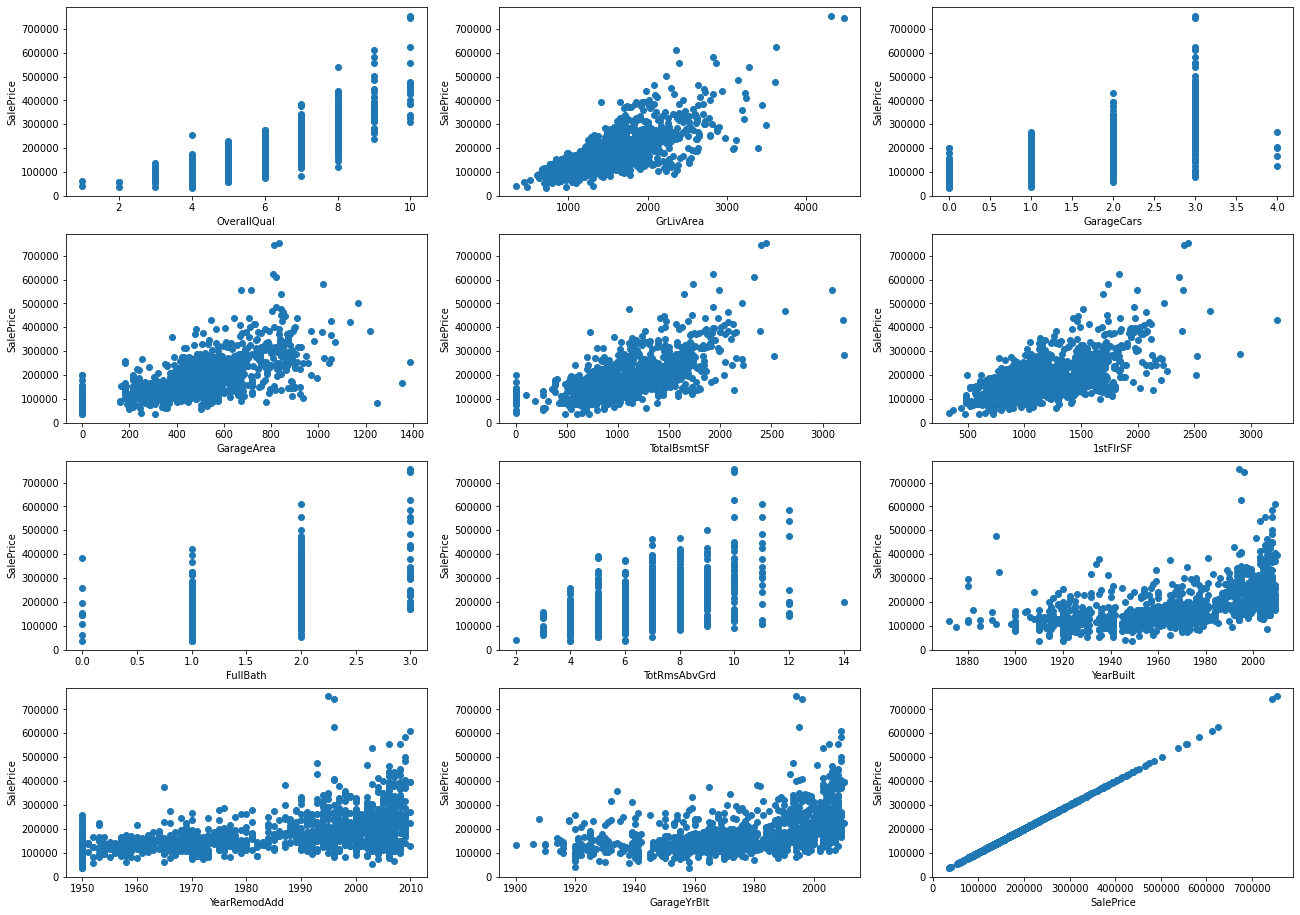

In [ ]:
draw_scatter_pairs(train[feature_names], rows=4, cols=3)

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [ ]:
y_train=train['SalePrice']
X_train=train.drop('SalePrice', axis='columns')

#İki veri seti satırlar üst üste gelecek biçimde birleştiriliyor
datasets=pd.concat((X_train, test),axis='index')

print(datasets.shape)

(2917, 79)


PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


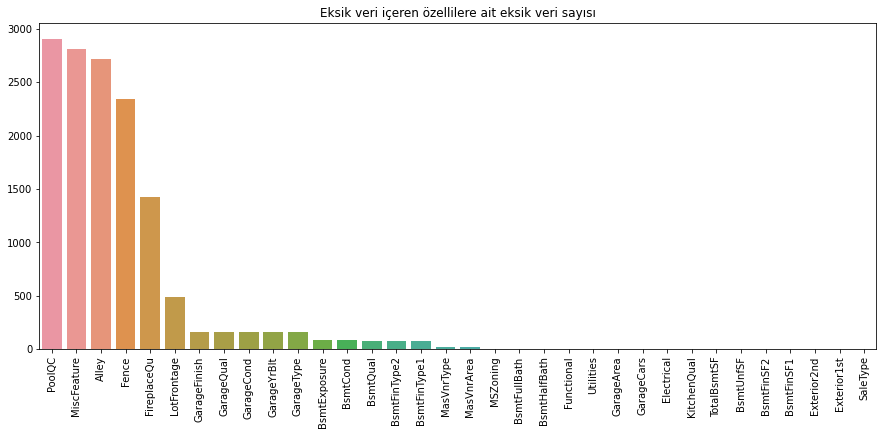

In [ ]:
show_missing_values(datasets)

In [ ]:
#Eksik değerlerin doldurulması için stratejiler belirleniyor
staretegies={}
staretegies['PoolQC']='None'
staretegies['MiscFeature']='None'
staretegies['Alley']='None'
staretegies['Fence']='None'
staretegies['FireplaceQu']='None'

#özel doldurma işleme gerektiren özelliklere kendi adını atıyoruz
staretegies['LotFrontage']='LotFrontage'

staretegies['GarageType']='None'
staretegies['GarageFinish']='None'
staretegies['GarageQual']='None'
staretegies['GarageCond']='None'

staretegies['GarageYrBlt']='Zero'
staretegies['GarageArea']='Zero'
staretegies['GarageCars']='Zero'

staretegies['BsmtFinSF1']='Zero'
staretegies['BsmtFinSF2']='Zero'
staretegies['BsmtUnfSF']='Zero'
staretegies['TotalBsmtSF']='Zero'
staretegies['BsmtFullBath']='Zero'
staretegies['BsmtHalfBath']='Zero'

staretegies['BsmtQual']='None'
staretegies['BsmtCond']='None'
staretegies['BsmtExposure']='None'
staretegies['BsmtFinType1']='None'
staretegies['BsmtFinType2']='None'

staretegies['MasVnrType']='None'
staretegies['MasVnrArea']='Zero'

staretegies['MSZoning']='Mode'

staretegies['Utilities']='Drop'

#özel doldurma işleme gerektiren özelliklere kendi adını atıyoruz
staretegies['Functional']='Functional'

staretegies['Electrical']='Mode'
staretegies['KitchenQual']='Mode'
staretegies['Exterior1st']='Mode'
staretegies['Exterior2nd']='Mode'
staretegies['SaleType']='Mode'

staretegies['MSSubClass']='None'

In [ ]:
def fill_missing_values(fill_data, mystaretegies):
    
    for column, strategy in mystaretegies.items():
        if strategy=='None':
            fill_data[column]=fill_data[column].fillna('None')
        elif strategy=='Zero':
            fill_data[column]=fill_data[column].fillna(0)
        elif strategy=='Mode':
            fill_data[column]=fill_data[column].fillna(fill_data[column].mode()[0])   
        elif strategy=='LotFrontage':
            #temp=fill_data.groupby("Neighborhood")
            fill_data[column]=fill_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
        elif strategy=='Drop':
            fill_data=fill_data.drop([column],axis=1)
        elif strategy=='Functional':
            fill_data[column]=fill_data[column].fillna('Typ')
    
    return fill_data

In [ ]:
datasets_no_missing=fill_missing_values(datasets, staretegies)

In [ ]:
#Eksik veri kalmadığından emin olalım
show_missing_values(datasets_no_missing)
print(datasets_no_missing.shape)

Veri setinde eksik bilgi yoktur
Series([], dtype: int64)
(2917, 78)


In [ ]:
#String tipinde değer içeren ancak numerik değerlere sahip sütünları
# str yani object tipine dönüştürüyoruz
for name in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    datasets_no_missing[name]= datasets_no_missing[name].astype(str)

In [ ]:
col_names=datasets_no_missing.columns.values
col_types=datasets_no_missing.dtypes
object_cols=[]
numeric_cols=[]
for col_name, col_type in zip(col_names, col_types):
    if col_type=='object':
        object_cols.append(col_name)
    else:
        numeric_cols.append(col_name)
print("String değerler içeren özellikler:")
print(object_cols)
print("\nSayıal değerler içeren özellikler:")
print(numeric_cols)

String değerler içeren özellikler:
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Sayıal değerler içeren özellikler:
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', '

In [ ]:
label_encoder_col_names = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#for ocn in object_cols:
    #if ocn not in label_encoder_cols:
        #print("{}: {}".format(ocn,len(datasets_no_missing[ocn].unique())))

In [ ]:
for col_name in label_encoder_col_names:
    labelEncoder=LabelEncoder()
    labelEncoder.fit(datasets_no_missing[col_name].values)
    datasets_no_missing[col_name]=labelEncoder.transform(datasets_no_missing[col_name].values)

In [ ]:
print(datasets_no_missing.shape)

(2917, 78)


In [ ]:
#Toplam sofa alanı için yeni bir özellik ekleyelim
datasets_no_missing['TotalSF'] = datasets_no_missing['TotalBsmtSF'] + datasets_no_missing['1stFlrSF'] + datasets_no_missing['2ndFlrSF']

In [ ]:
# Sayısal Değerlerin Normal Dağılıma Çekilmesi
numeric_feats = datasets_no_missing.dtypes[datasets_no_missing.dtypes != "object"].index

# Özelliklerin çarpıklıkları belirleniyor
skewed_feats = datasets_no_missing[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nNormal dağılımdan uzak değerler: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Normal dağılımdan uzak değerler: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("Box Cox transform uygulanan özelliklerin sayısı:{}".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    datasets_no_missing[feat] = boxcox1p(datasets_no_missing[feat], lam)

Box Cox transform uygulanan özelliklerin sayısı:59


In [ ]:
datasets_no_missing_dummies=pd.get_dummies(datasets_no_missing)
print(datasets_no_missing_dummies.shape)

(2917, 220)


önem hesaplandı


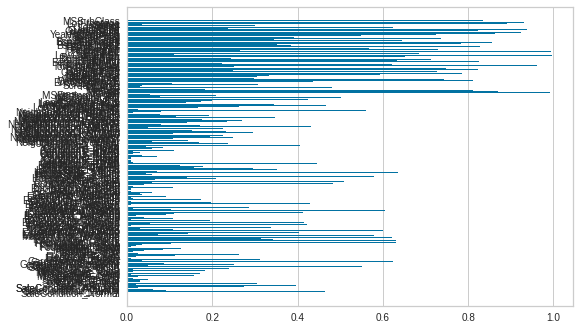

In [ ]:
from yellowbrick.features import Rank1D

X_yellow=datasets_no_missing_dummies[:ntrain]
nfeature_name=datasets_no_missing_dummies.columns.values[:-1]
rank1D=Rank1D(features=nfeature_name, algorithm="shapiro")
rank1D.fit(X_yellow[nfeature_name], y_train)
rank1D.transform(X_yellow[nfeature_name])
 
#rank1D.poof()
print("önem hesaplandı")

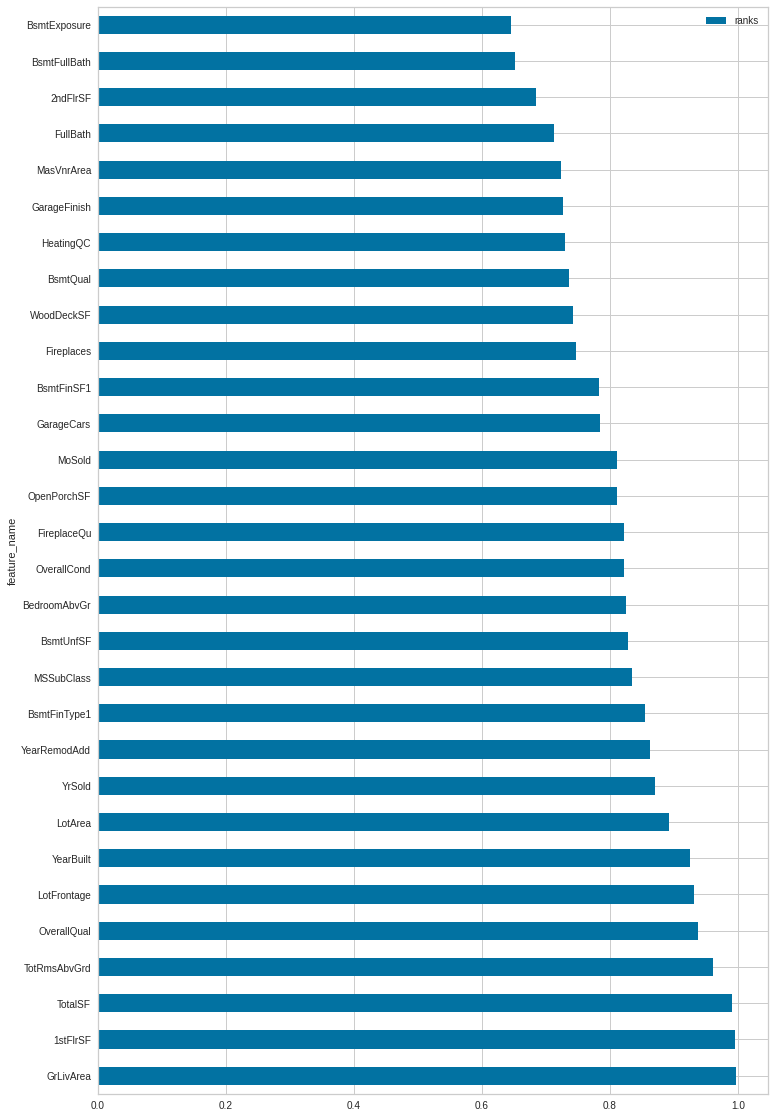

In [ ]:
df=pd.DataFrame()
df['feature_name']=nfeature_name
df['ranks']=rank1D.ranks_


df.sort_values(by=['ranks'],ascending=False, inplace=True)
df.set_index('feature_name', inplace=True)
df.head()

fig, ax=plt.subplots(1, figsize=(12,20))
df[:30].plot.barh(ax=ax)

In [ ]:
print(datasets_no_missing_dummies.shape)

(2917, 220)


In [ ]:
n=30
#En önemli özellikler alınıyor
n_most_important=df.index.values[:n]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#en önemli özellikler ölçeklendirilmesi için eğitiliyor
scaler.fit(datasets_no_missing_dummies[n_most_important])

#En önemli özellikler ölçeklendiriliyor
datasets_no_missing_dummies_scaled=scaler.transform(datasets_no_missing_dummies[n_most_important])

In [ ]:
# train ve test Veri Setlerinin Ayrıştırılması
#Eğitim veri seti
preprocessed_train = datasets_no_missing_dummies_scaled[:ntrain]

#Test veri seti
preprocessed_test = datasets_no_missing_dummies_scaled[ntrain:]

#preprocessed_train.head(10)

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(preprocessed_train)
    rmse= np.sqrt(-cross_val_score(model, preprocessed_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(model_lgb)
print("LGMRboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LGMRboost score: 23733.9431 (2327.7987)



In [ ]:
score = rmsle_cv(model_xgb)
print("XGBRboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGBRboost score: 23552.8993 (2359.6306)



In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
# En İyi Modelin Eğitilmesi
model_xgb.fit(preprocessed_train, y_train)
xgb_train_pred = model_xgb.predict(preprocessed_train)
xgb_pred = model_xgb.predict(preprocessed_test)
print(rmsle(y_train, xgb_train_pred))

4426.582290139752


In [ ]:
# Gönderinin Hazırlanması
print("Gönderi hazırlanıyor")
submision = pd.DataFrame()
submision['Id'] = test_ids
submision['SalePrice'] = xgb_pred
submision.to_csv('n_most_xgb_submission.csv',index=False)
print("Gönderi kaydedildi")
submision.head(20)
print(xgb_train_pred[:20])
print(y_train.values[:20])
print(submision.values[:20])

Gönderi hazırlanıyor
Gönderi kaydedildi
[206928.16 183467.36 220620.62 143277.34 259429.62 141867.12 302761.1
 203055.03 140243.25 121066.01 126853.78 348192.28 140445.61 267521.44
 157641.47 132309.5  147903.1   95881.42 157015.86 137925.44]
[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000]
[[  1461.        125141.4453125]
 [  1462.        157979.921875 ]
 [  1463.        193457.09375  ]
 [  1464.        198188.       ]
 [  1465.        184133.5625   ]
 [  1466.        176952.359375 ]
 [  1467.        182329.796875 ]
 [  1468.        170712.9375   ]
 [  1469.        179181.296875 ]
 [  1470.        123499.5546875]
 [  1471.        202601.75     ]
 [  1472.         95054.4140625]
 [  1473.         92916.25     ]
 [  1474.        153349.390625 ]
 [  1475.        118390.8203125]
 [  1476.        378185.15625  ]
 [  1477.        260083.015625 ]
 [  1478.        280342.6875   ]
 [  1479.        224